importing libraries and loading dataframe

In [3]:
import pandas as pd
import sys
import os
project_path = os.path.join("C:\\Users", "LUQMAAN", "OneDrive", "Documents", "gitprojects",
    "Marketing Funnel & Attribution Analysis",
    "marketing-analytics-performance-analyst")
sys.path.append(project_path)
from data import load_data
df = load_data()
df.head()

,user_id,timestamp,channel,conversion,conversion_value
0,user_18779,2023-02-08,Social Media,0,0
1,user_13494,2023-01-15,Organic Search,0,0
2,user_2532,2023-01-21,Paid Search,0,0
3,user_11317,2023-01-19,Organic Search,0,0
4,user_13927,2023-01-11,Paid Search,0,0


In [14]:
touchpoints = df.groupby('user_id').size().reset_index(name='touchpoints')
converted=df.groupby('user_id')['conversion'].max().reset_index(name='conversions')

user_funnel=pd.merge(touchpoints,converted,on='user_id')
user_funnel.head()

,user_id,touchpoints,conversions
0,user_1,3,1
1,user_10,4,0
2,user_100,1,0
3,user_1000,3,0
4,user_10000,5,0


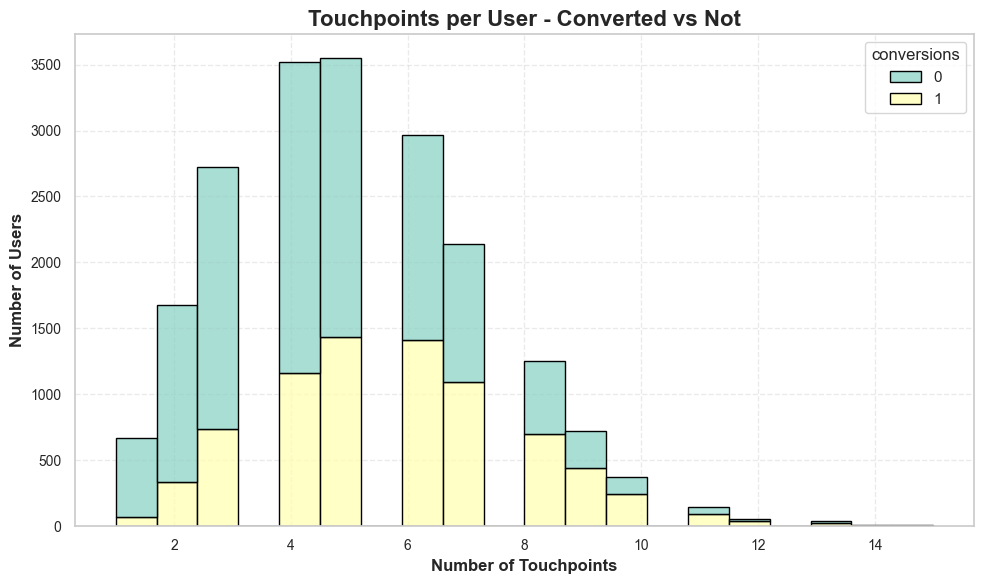

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
ax=sns.histplot(
    data=user_funnel,
    x='touchpoints',
    hue="conversions",
    bins=20,
    multiple="stack",
    palette="Set3",
    edgecolor="black"
)

plt.title("Touchpoints per User - Converted vs Not", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of Touchpoints", fontsize=12, fontweight = 'bold')
plt.ylabel("Number of Users", fontsize = 12, fontweight = 'bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha = 0.4)
plt. tight_layout()

plt.show()

In [33]:
df_sorted = df.sort_values(by=['user_id','timestamp'])

df_sorted['touch_order'] = df_sorted.groupby('user_id').cumcount()+1
df_sorted['total_touches'] = df_sorted.groupby('user_id')['user_id'].transform('count')

df_sorted['is_first'] = df_sorted['touch_order'] == 1
df_sorted['is_last'] = df_sorted['touch_order'] == df_sorted['total_touches']

df_sorted.head(3)

,user_id,timestamp,channel,conversion,conversion_value,touch_order,total_touches,is_first,is_last
91847,user_1,2023-01-14,Social Media,0,0,1,3,True,False
1521,user_1,2023-02-14,Referral,1,31,2,3,False,False
92088,user_1,2023-02-25,Direct,0,0,3,3,False,True


C:\Users\LUQMAAN\AppData\Local\Temp\ipykernel_6064\3716246677.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=first_touch_converted, x='channel', order=first_touch_converted['channel'].value_counts().index, palette="Set2")
C:\Users\LUQMAAN\AppData\Local\Temp\ipykernel_6064\3716246677.py:10: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\LUQMAAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


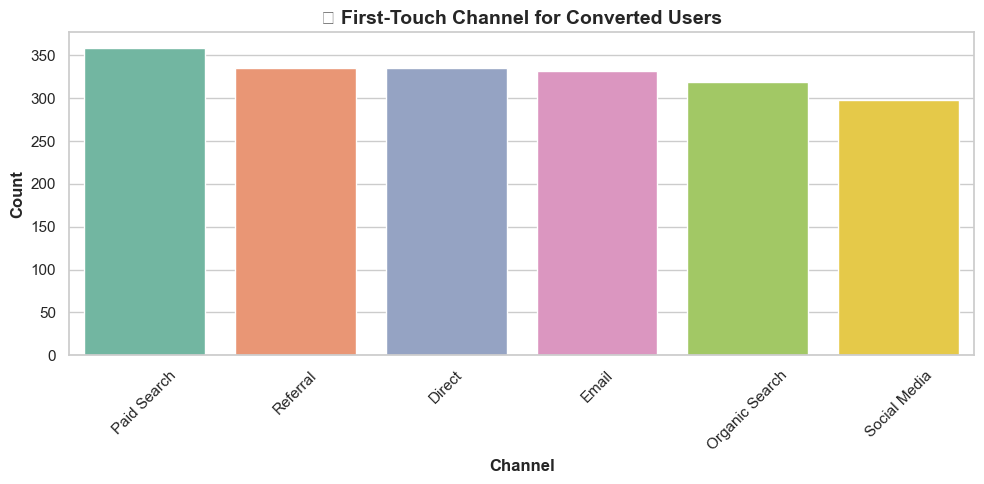

In [38]:
convered_only = df_sorted[df_sorted['conversion'] ==1]
first_touch_converted = convered_only[convered_only['is_first']]

plt.figure(figsize=(10, 5))
sns.countplot(data=first_touch_converted, x='channel', order=first_touch_converted['channel'].value_counts().index, palette="Set2")
plt.title("📍 First-Touch Channel for Converted Users", fontsize=14, fontweight='bold')
plt.xlabel("Channel", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\LUQMAAN\AppData\Local\Temp\ipykernel_6064\3275465955.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=last_touch_converted, x='channel',
C:\Users\LUQMAAN\AppData\Local\Temp\ipykernel_6064\3275465955.py:20: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\LUQMAAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


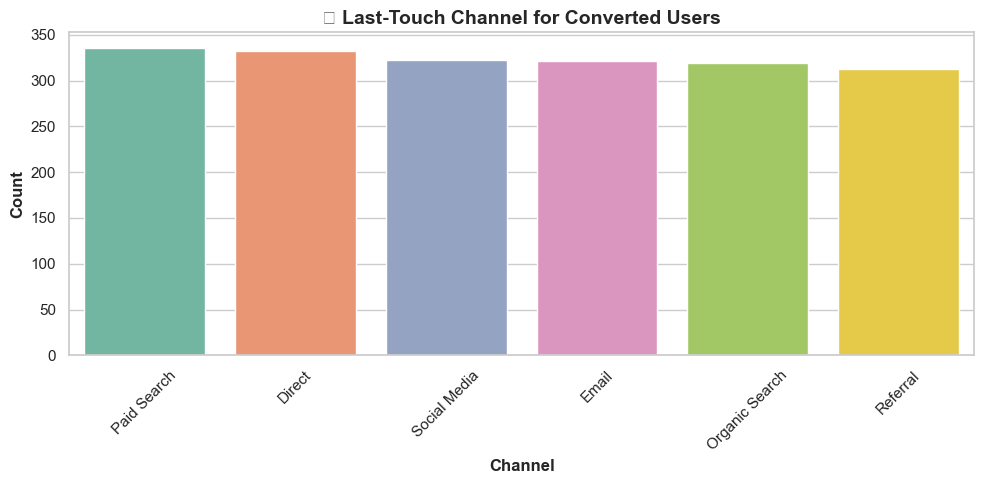

In [39]:
# Filter converted users
converted_only = df_sorted[df_sorted['conversion'] == 1]

# Get their last touch
last_touch_converted = converted_only[converted_only['is_last']]

# Plot last-touch channels
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=last_touch_converted, x='channel', 
              order=last_touch_converted['channel'].value_counts().index,
              palette="Set2")

plt.title("🏁 Last-Touch Channel for Converted Users", fontsize=14, fontweight='bold')
plt.xlabel("Channel", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


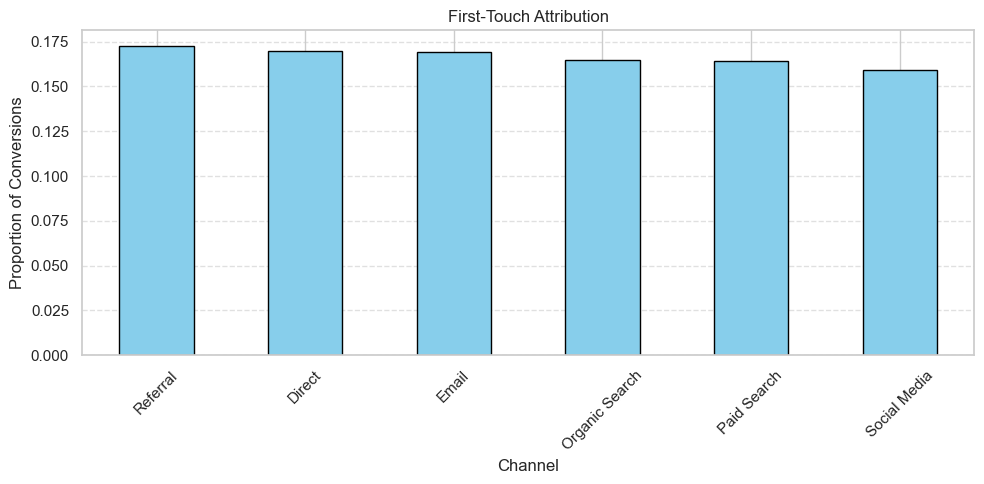

In [42]:
# Only users who converted
converted_users = df[df['conversion'] == 1]['user_id'].unique()
df_converted = df[df['user_id'].isin(converted_users)]

# Sort by time for each user
df_converted = df_converted.sort_values(by=['user_id', 'timestamp'])

first_touch = df_converted.groupby('user_id').first().reset_index()
first_attribution = first_touch['channel'].value_counts(normalize=True)

first_attribution.plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black')
plt.title("First-Touch Attribution")
plt.ylabel("Proportion of Conversions")
plt.xlabel("Channel")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 🔎 First-Touch Attribution Summary

This chart shows which channels users first interacted with before converting.  
- **Social Media** and **Paid Search** dominate as top entry points.
- These channels are strong at **initial user acquisition**, though they may not be responsible for the final conversion.


C:\Users\LUQMAAN\AppData\Local\Temp\ipykernel_6064\1408062324.py:11: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\LUQMAAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


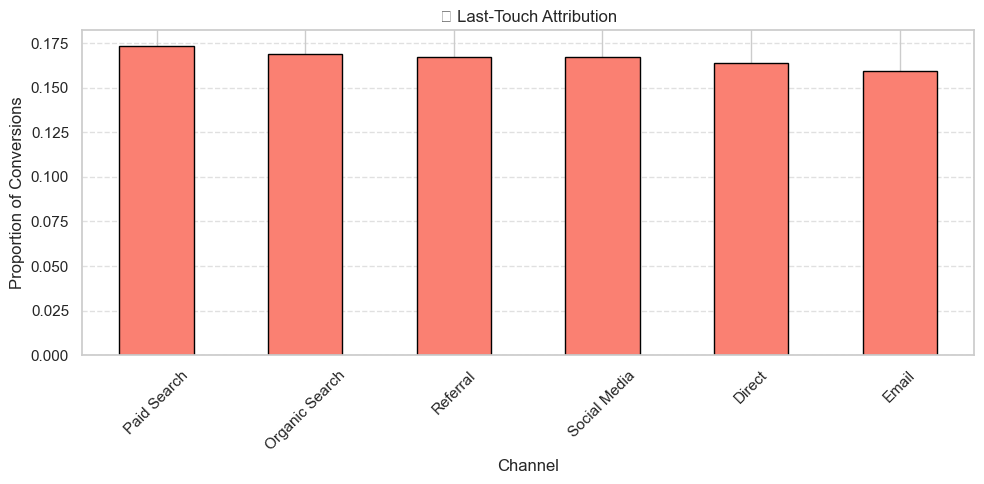

In [43]:
last_touch = df_converted.groupby('user_id').last().reset_index()
last_attribution = last_touch['channel'].value_counts(normalize=True)

# Plot
last_attribution.plot(kind='bar', figsize=(10, 5), color='salmon', edgecolor='black')
plt.title("🏁 Last-Touch Attribution")
plt.ylabel("Proportion of Conversions")
plt.xlabel("Channel")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 🔎 Last-Touch Attribution Summary

This chart highlights the final channel users engaged with before converting.  
- **Email** and **Direct** are prominent, suggesting they play a key role in **closing conversions**.
- These channels are effective at re-engagement or final decision nudges.


C:\Users\LUQMAAN\AppData\Local\Temp\ipykernel_6064\1807756291.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\LUQMAAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


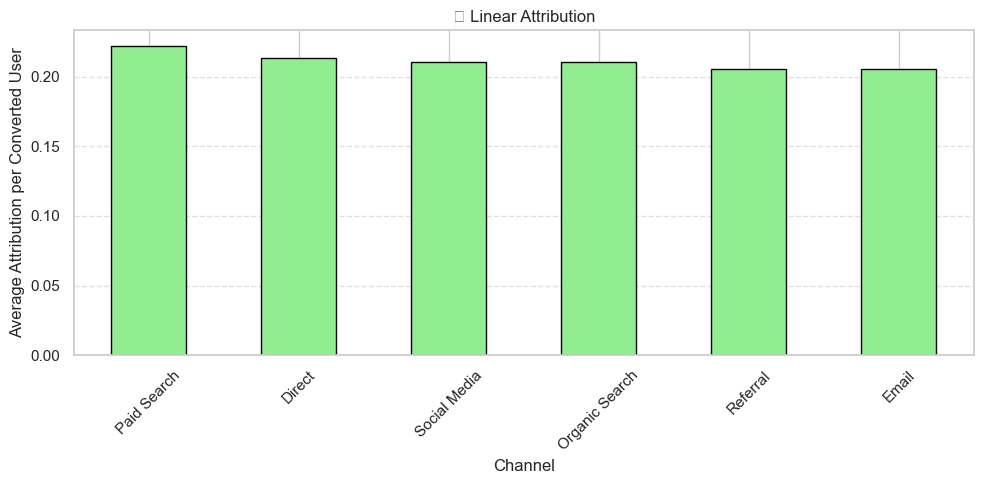

In [44]:
linear_attribution = df_converted.groupby('channel')['conversion'].sum()
linear_attribution = linear_attribution / df_converted['user_id'].nunique()  # Normalize to % of users

# Plot
linear_attribution.sort_values(ascending=False).plot(
    kind='bar', figsize=(10, 5), color='lightgreen', edgecolor='black'
)
plt.title("📊 Linear Attribution")
plt.ylabel("Average Attribution per Converted User")
plt.xlabel("Channel")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 🔎 Linear Attribution Summary

Linear attribution assigns equal credit to every channel in a converting user's journey.  
- Channels like **Paid Search**, **Social Media**, and **Email** consistently contribute across the funnel.
- This model reflects the **multi-touch nature** of most conversions, especially for users with longer journeys.